# Iris data with Supervised Learning

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Set the parameters to control general style of plot
sns.set_style("darkgrid")
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [3]:
# Load dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                 names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

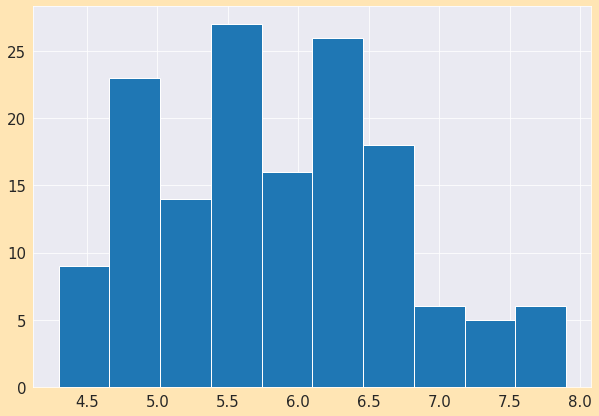

In [8]:
# histograms
df['sepal_length'].hist()

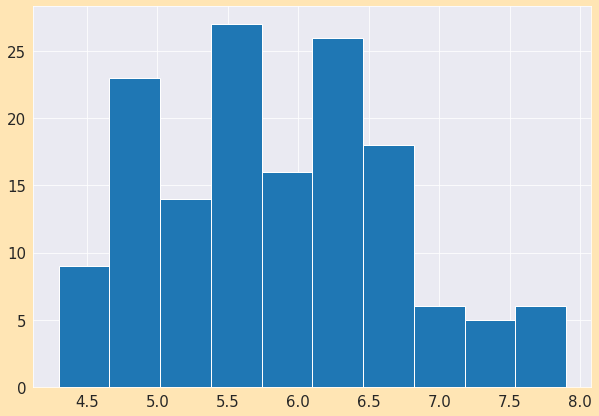

In [9]:
df['sepal_length'].hist()

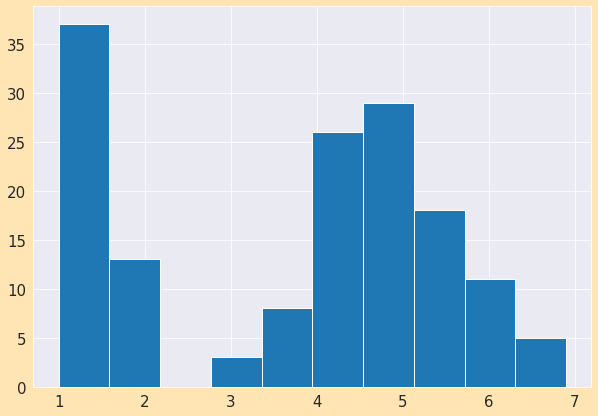

In [10]:
df['petal_length'].hist()

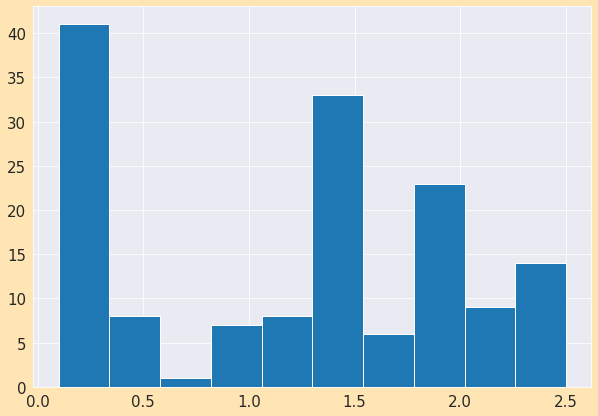

In [11]:
df['petal_width'].hist()

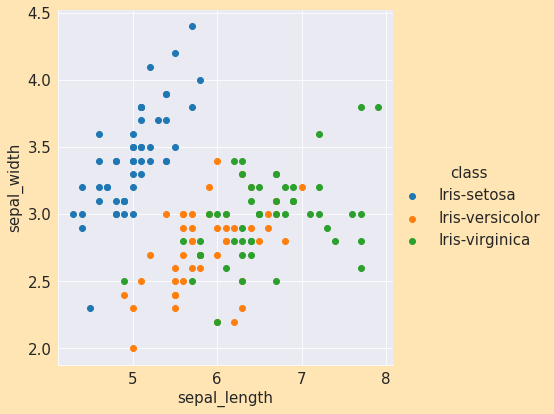

In [12]:
df['class'].value_counts() 
sns.FacetGrid(df, hue ="class", height = 6).map(plt.scatter, 'sepal_length', 'sepal_width').add_legend()

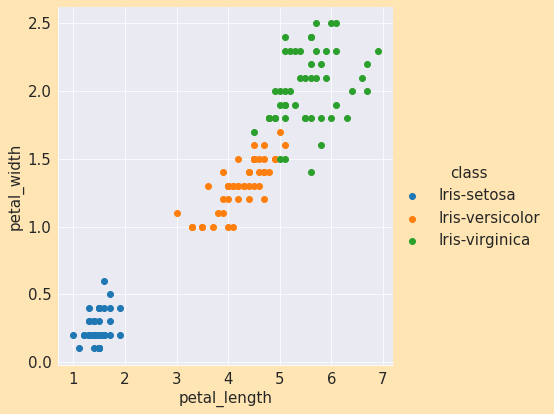

In [13]:
sns.FacetGrid(df, hue ="class", height = 6).map(plt.scatter, 'petal_length', 'petal_width').add_legend()

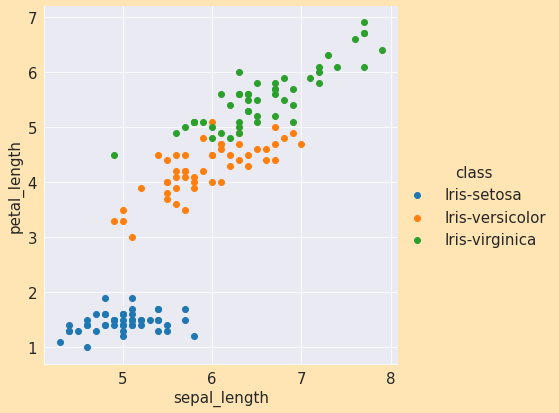

In [14]:
sns.FacetGrid(df, hue ="class", height = 6).map(plt.scatter, 'sepal_length', 'petal_length').add_legend()

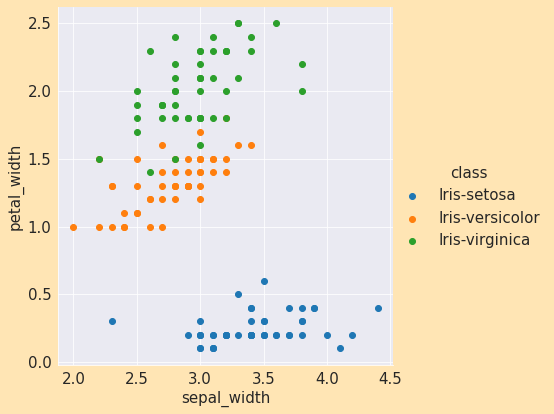

In [15]:
sns.FacetGrid(df, hue ="class", height = 6).map(plt.scatter, 'sepal_width', 'petal_width').add_legend()

In [16]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


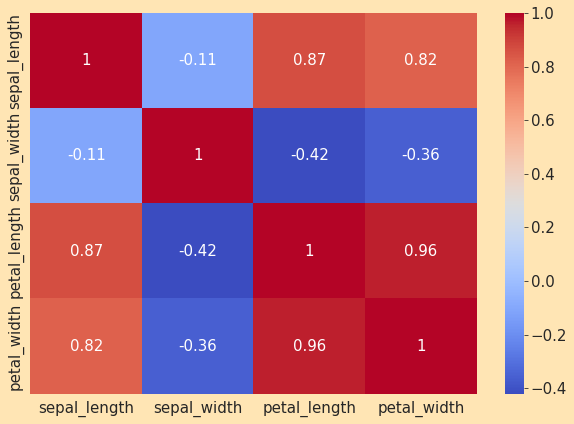

In [17]:
corr = df.corr()
fig, ax = plt.subplots()
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [18]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
df['class'] = le.fit_transform(df['class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['class'])
Y = df['class']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [25]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [26]:
# model training
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [27]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777
